In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [71]:
data=pd.read_csv('https://raw.githubusercontent.com/zhongyang-hu/6289/main/TSLA.csv')
print(data.shape)
print(data.head(10))
print(data.isnull().values.any())

(1259, 7)
         Date       Open       High        Low      Close  Adj Close    Volume
0  2015-07-10  52.444000  52.599998  51.563999  51.830002  51.830002  13054500
1  2015-07-13  52.450001  52.509998  51.209999  52.431999  52.431999  14801500
2  2015-07-14  52.419998  53.198002  52.102001  53.130001  53.130001   9538000
3  2015-07-15  53.348000  53.498001  52.416000  52.627998  52.627998  10108000
4  2015-07-16  52.844002  53.439999  52.632000  53.335999  53.335999   8080000
5  2015-07-17  54.500000  55.108002  53.650002  54.931999  54.931999  25020500
6  2015-07-20  55.000000  57.330002  54.507999  56.452000  56.452000  24892500
7  2015-07-21  54.009998  54.700001  53.310001  53.354000  53.354000  30543500
8  2015-07-22  52.254002  53.888000  52.172001  53.574001  53.574001  15525000
9  2015-07-23  53.930000  53.980000  53.054001  53.439999  53.439999  11136000
False


In [131]:
#
#normalize
train_data=data.iloc[:1000,4:5].values


sc = MinMaxScaler(feature_range = (0, 1))
training_n = sc.fit_transform(train_data)
# Creating a data structure with 60 time-steps and 1 output
x_train = []
y_train = []
for i in range(73, 1000):
    temp=np.array([np.array(training_n[i-73:i-13, 0])])
    temp=temp.T
    
    
    x_train.append(temp)
    temp1=np.array(training_n[i-13, 0])
    y_train.append(temp1)
x_train, y_train = np.array(x_train), np.array(y_train)
#x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[2], 3))
print(x_train.shape)
print(y_train.shape)

(927, 60, 1)
(927,)


In [132]:
model1 = Sequential()
model1.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model1.add(Dropout(0.2))

model1.add(LSTM(units = 50, return_sequences = True))
model1.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model1.add(LSTM(units = 50, return_sequences = True))
model1.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model1.add(LSTM(units = 50))
model1.add(Dropout(0.2))
# Adding the output layer
model1.add(Dense(units = 1))

# Compiling the RNN
model1.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model1.fit(x_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
29/29 [==============================] - 11s 134ms/step - loss: 0.0544
Epoch 2/100
29/29 [==============================] - 4s 130ms/step - loss: 0.0174
Epoch 3/100
29/29 [==============================] - 4s 129ms/step - loss: 0.0146
Epoch 4/100
29/29 [==============================] - 4s 126ms/step - loss: 0.0133
Epoch 5/100
29/29 [==============================] - 4s 128ms/step - loss: 0.0135
Epoch 6/100
29/29 [==============================] - 4s 128ms/step - loss: 0.0121
Epoch 7/100
29/29 [==============================] - 4s 127ms/step - loss: 0.0124
Epoch 8/100
29/29 [==============================] - 4s 127ms/step - loss: 0.0113
Epoch 9/100
29/29 [==============================] - 4s 126ms/step - loss: 0.0122
Epoch 10/100
29/29 [==============================] - 4s 126ms/step - loss: 0.0107
Epoch 11/100
29/29 [==============================] - 4s 126ms/step - loss: 0.0107
Epoch 12/100
29/29 [==============================] - 4s 127ms/step - loss: 0.0093
Epoch 13/100

In [136]:

dataset_train = data.iloc[:1000, 4:5]
dataset_test = data.iloc[1000:, 4:5]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
print(inputs.shape)
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
x_test = []
for i in range(60, 319):
    temp=np.array([np.array(inputs[i-60:i, 0])])
    temp=temp.T
    
    
    x_test.append(temp)

x_test = np.array(x_test)
#x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[2], 3))
print(x_test.shape)

(319, 1)
(259, 60, 1)


In [137]:
predicted_lag1 = model1.predict(x_test)

predicted_lag1 = sc.inverse_transform(predicted_lag1)
print(predicted_lag1.shape)

(259, 1)


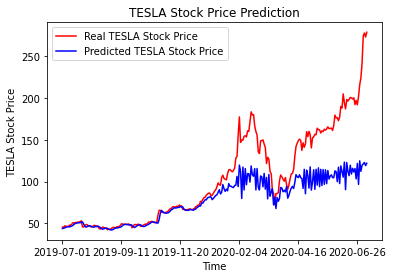

In [138]:
# Visualising the results
plt.plot(data.loc[1000:, 'Date'],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(data.loc[1000:, 'Date'],predicted_lag1, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.xticks(np.arange(0,260,50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

In [139]:
#normalize
train_data=data.iloc[:1000,4:5].values


sc = MinMaxScaler(feature_range = (0, 1))
training_n = sc.fit_transform(train_data)
# Creating a data structure with 60 time-steps and 1 output
x_train = []
y_train = []
for i in range(73, 1000):
    temp=np.array([np.array(training_n[i-73:i-13, 0])])
    temp=temp.T
    
    
    x_train.append(temp)
    temp1=np.array(training_n[i, 0])
    y_train.append(temp1)
x_train, y_train = np.array(x_train), np.array(y_train)
#x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[2], 3))
print(x_train.shape)
print(y_train.shape)

(927, 60, 1)
(927,)


In [140]:
model2 = Sequential()
model2.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model2.add(Dropout(0.2))

model2.add(LSTM(units = 50, return_sequences = True))
model2.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model2.add(LSTM(units = 50, return_sequences = True))
model2.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model2.add(LSTM(units = 50))
model2.add(Dropout(0.2))
# Adding the output layer
model2.add(Dense(units = 1))

# Compiling the RNN
model2.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model2.fit(x_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
29/29 [==============================] - 14s 181ms/step - loss: 0.0527
Epoch 2/100
29/29 [==============================] - 4s 132ms/step - loss: 0.0227
Epoch 3/100
29/29 [==============================] - 4s 132ms/step - loss: 0.0207
Epoch 4/100
29/29 [==============================] - 4s 129ms/step - loss: 0.0203
Epoch 5/100
29/29 [==============================] - 4s 128ms/step - loss: 0.0224
Epoch 6/100
29/29 [==============================] - 4s 125ms/step - loss: 0.0203
Epoch 7/100
29/29 [==============================] - 4s 126ms/step - loss: 0.0196
Epoch 8/100
29/29 [==============================] - 4s 127ms/step - loss: 0.0195
Epoch 9/100
29/29 [==============================] - 4s 126ms/step - loss: 0.0195
Epoch 10/100
29/29 [==============================] - 4s 129ms/step - loss: 0.0200
Epoch 11/100
29/29 [==============================] - 4s 128ms/step - loss: 0.0195
Epoch 12/100
29/29 [==============================] - 4s 131ms/step - loss: 0.0186
Epoch 13/100

(259, 1)


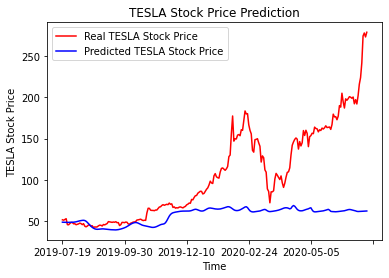

In [142]:
#predict result for 14days lag

predicted_lag1 = model2.predict(x_test)

predicted_lag1 = sc.inverse_transform(predicted_lag1)
print(predicted_lag1.shape)
plt.plot(data.loc[1013:, 'Date'],dataset_test.values[13:,], color = 'red', label = 'Real TESLA Stock Price')
plt.plot(data.loc[1013:, 'Date'],predicted_lag1[:259-13,], color = 'blue', label = 'Predicted TESLA Stock Price')
plt.xticks(np.arange(0,260,50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()